In [1]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 330.3 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/282.6 kB 845.5 kB/s eta 0:00:01
   ------------------------------ --------- 215.0/282.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.6 MB/s eta 0:00:00


In [2]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

# Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# 군집 방법 : AgglomerativeClustering(계층형), KMeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# 실루엣(Silhouette) 계수 산출
from sklearn.metrics import silhouette_samples, silhouette_score
# 실루엣 계수 산출 및 시각화 라이브러리 (pip install yellowbrick 실행)
from yellowbrick.cluster import SilhouetteVisualizer

#### 그래프 옵션 지정

In [3]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "Malgun Gothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

### 데이터 구성하기

In [4]:
# df_raw = pd.read_csv("D:/WORK/Data/직무능력평가.csv", engine = "python")
df_raw = pd.read_csv("Big Data 분석/직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [5]:
# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)

# 위에서부터 자료 5개 확인
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

#### 데이터 분리

In [6]:
# 목표 변수:모든 행 & 1번째 열
df_raw_y = df_raw_scaled[:, 0]
# 설명 변수::모든 행 & 1번째 제외한 모든 열
df_raw_x = df_raw_scaled[:,1::]

## @계층형 군집분석

In [7]:
# 연결: ward, 거리 계산: Euclidean: ward~Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
# 연결: average, 거리 계산: Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [8]:
# 군집 생성 결과 확인
Z_ward

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ],
       [ 1.        , 21.        ,  1.22298201,  2.        ],
       [11.        , 32.        ,  1.31728974,  3.        ],
       [ 2.        ,  4.        ,  1.33423955,  2.        ],
       [24.        , 36.        ,  1.47235046,  4.        ],
       [30.        , 37.        ,  1.65014418,  4.        ],
       [18.        , 35.        ,  1.78970024,  3.        ],
       [29.        , 34.        ,  1.8539993 ,  3.        ],
       [10.        , 12.        ,  1.88477465,  2.        ],
       [31.        , 38.        ,  1.94570646,  6.        ],
       [25.        , 33.        ,  2.11914806,  3.        ],
       [ 5.        , 42.        ,  2.16582648,  3.        ],
       [17.        , 19.

Text(0, 0.5, 'Distance')

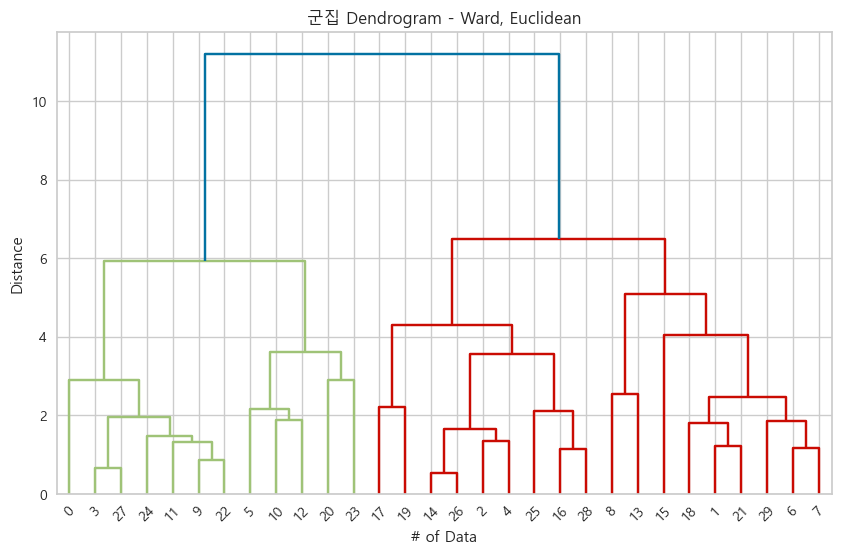

In [9]:
#덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
# DataFrame 변경:Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

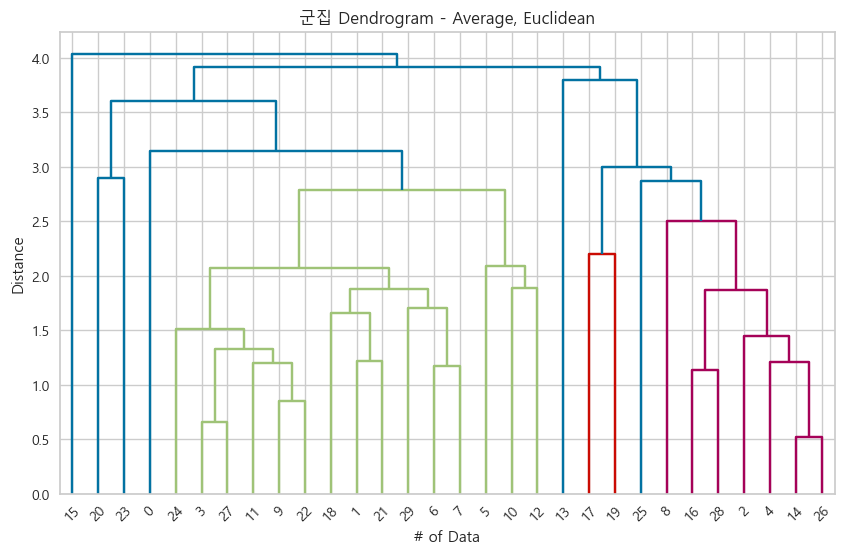

In [10]:
#덴드로그램[연결: average, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
dendrogram(Z_average, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Average, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

In [11]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_H = fcluster(Z = Z_ward, t = 5, criterion="distance")
# 데이터에 계층형 군집 결과 입력
df_raw["cluster_H"] = cluster_H
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [12]:
# 집계 함수를 이용한 군집별 데이터 요약
df_summary_H = df_raw.groupby("cluster_H").agg(["min", "mean", "max"])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = df_summary_H.columns.get_level_values(0)
level1 = df_summary_H.columns.get_level_values(1)
df_summary_H.columns = level0 + "_" + level1
df_summary_H.reset_index(inplace = True)
df_summary_H.round(3)

,cluster_H,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


array([[<Axes: title={'center': 'DISSATIS'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PRIVILEGE'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'CHANCE'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'ADVANCE'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'CRITISM'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PROMOTION'}, xlabel='cluster_H'>]],
      dtype=object)

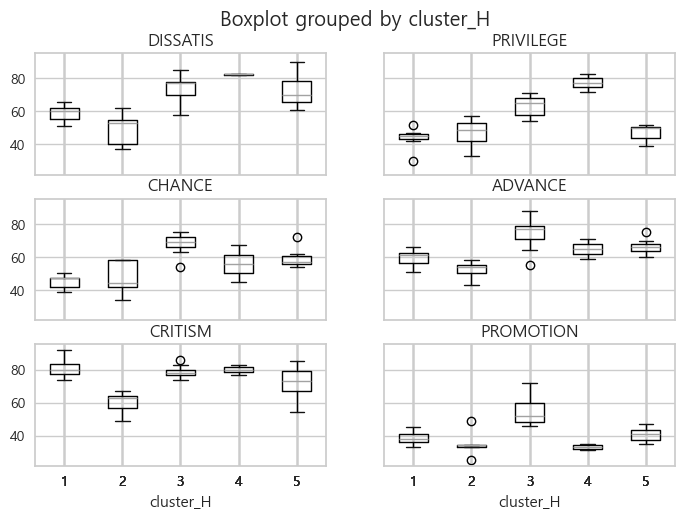

In [13]:
# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=["DISSATIS", "PRIVILEGE","CHANCE", "ADVANCE", "CRITISM", "PROMOTION"]
               , by = "cluster_H")

array([[<Axes: title={'center': 'DISSATIS'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PRIVILEGE'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'CHANCE'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'ADVANCE'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'CRITISM'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PROMOTION'}, xlabel='cluster_H'>]],
      dtype=object)

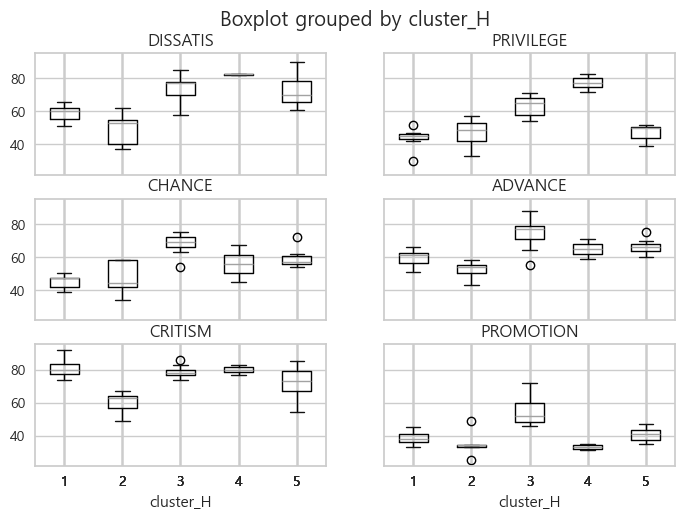

In [14]:
# Boxplot을 활용한 군집별 변수 분포
df_raw.boxplot(column=["DISSATIS", "PRIVILEGE","CHANCE", "ADVANCE", "CRITISM", "PROMOTION"]
               , by = "cluster_H")

<Axes: title={'center': 'EVAL'}, xlabel='cluster_H'>

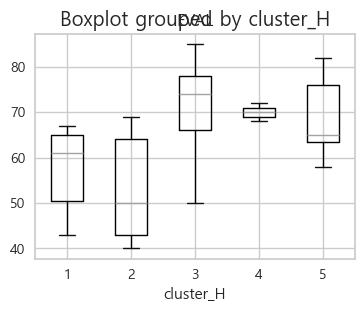

In [15]:
# Boxplot을 활용한 군집별 목표변수 분포
df_raw.boxplot(column=["EVAL"], by = "cluster_H", figsize=(4,3))

## @k-평균 군집분석

In [16]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
df_error.round(3)

C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

,NumberofCluster,Error
0,1,180.000
1,2,114.083
2,3,93.637
3,4,78.502
4,5,69.436
5,6,60.565
6,7,53.115
7,8,44.938
8,9,38.150
9,10,32.772


Text(0, 0.5, 'Sum of Square')

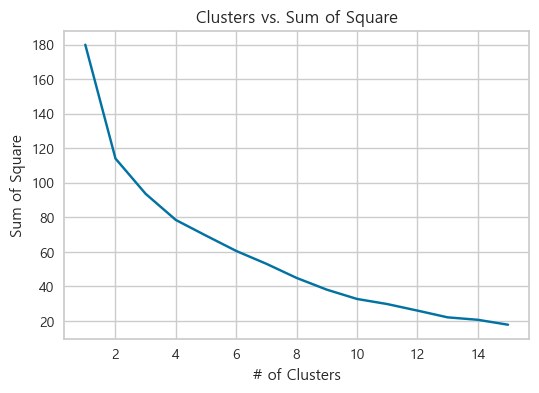

In [17]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

In [18]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_]
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10)

C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM
0,43,51,30,39,61,92,45,1,1
1,63,64,51,54,63,73,47,5,1
2,71,70,68,69,76,86,48,3,3
3,61,63,45,47,54,84,35,1,1
4,81,78,56,66,71,83,47,3,3
5,43,55,49,44,54,49,34,2,2
6,58,67,42,56,66,68,35,5,1
7,71,75,50,55,70,66,41,5,1
8,72,82,72,67,71,83,31,4,5
9,67,61,45,47,62,80,41,1,1


In [19]:
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace=False). \
    groupby("cluster_KM").agg(["min", "mean", "max"])
level0 = df_summary_KM.columns.get_level_values(0)
level1 = df_summary_KM.columns.get_level_values(1)
df_summary_KM.columns = level0 + "_" + level1
df_summary_KM.reset_index(inplace = True)
df_summary_KM.round(3)

,cluster_KM,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,62.533,82,51,63.067,82,30,46.333,57,...,62,51,62.200,75,63,76.533,92,25,38.533,47
1,2,40,44.333,50,37,44.000,55,33,41.333,49,...,58,43,49.000,54,49,56.667,64,33,38.667,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,81,81.000,81,90,90.000,90,50,50.000,50,...,72,60,60.000,60,54,54.000,54,36,36.000,36
4,5,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35


array([[<Axes: title={'center': 'DISSATIS'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'PRIVILEGE'}, xlabel='cluster_KM'>],
       [<Axes: title={'center': 'CHANCE'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'ADVANCE'}, xlabel='cluster_KM'>],
       [<Axes: title={'center': 'CRITISM'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'PROMOTION'}, xlabel='cluster_KM'>]],
      dtype=object)

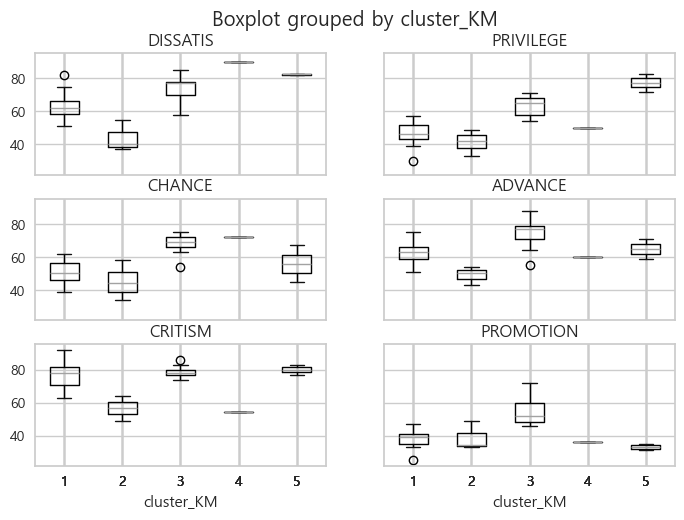

In [20]:
# Boxplot을 활용한 군집별 tjfaud변수 분포
df_raw.boxplot(column=["DISSATIS", "PRIVILEGE","CHANCE", "ADVANCE", "CRITISM", "PROMOTION"]
               , by = "cluster_KM")

<Axes: title={'center': 'EVAL'}, xlabel='cluster_KM'>

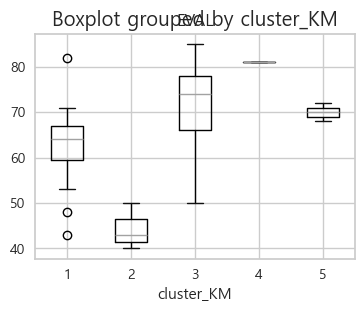

In [21]:
# Boxplot을 활용한 군집별 목표변수 분포
df_raw.boxplot(column=["EVAL"], by = "cluster_KM", figsize=(4,3))

## 적정 군집 수 결정

### @예제-적정 군집 수 결정
. sklearn에서 지원하는 AgglomerativeClustering, KMeans (실루엣 계수는 silhouette_score 활용)

In [22]:
# scipy.cluster.hierarchy의 계층형 군집분석은 실루엣 계수 산출 안됨
# 실루엣 계수 산출:sklearn.AgglomerativeClustering(계층형군집분석)
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

계층형(군집 수=3) 실루엣 계수 =  0.187
계층형(군집 수=4) 실루엣 계수 =  0.198


In [23]:
# 실루엣 계수 산출:sklearn.KMeans(k평균군집분석)
cls_k = KMeans(3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k-평균(군집 수=3) 실루엣 계수 =  0.239


C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k-평균(군집 수=4) 실루엣 계수 =  0.205


#### @@ 해석
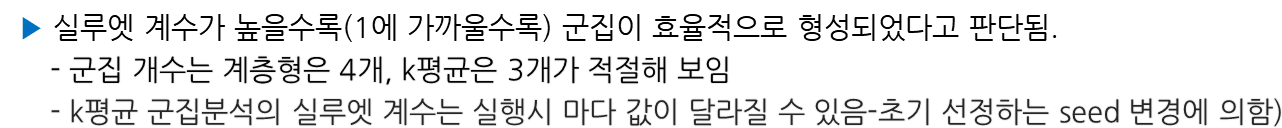

### @참조-적정 군집 수 결정
. sklearn에서 지원하는 AgglomerativeClustering (실루엣 계수는 silhouette_samples, silhouette_score 활용)

C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

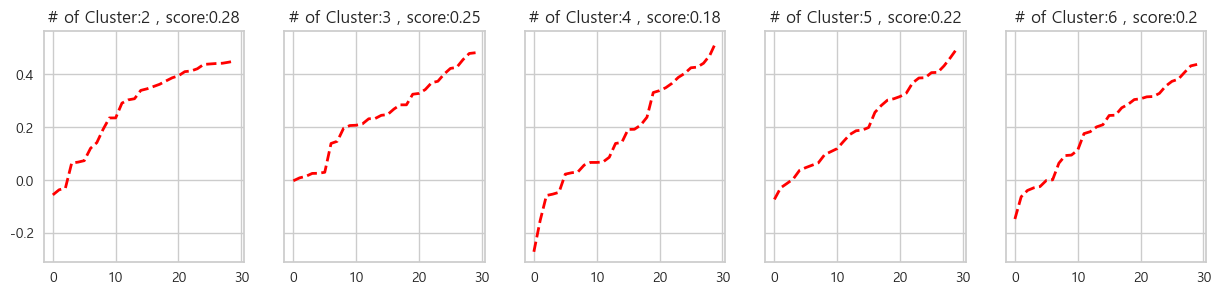

In [24]:
f, axes = plt.subplots(1, 5, sharex=True, sharey=True)
f.set_size_inches(15, 3)

for i, ax in enumerate(axes):
#     cluster_nums = AgglomerativeClustering(n_clusters=i+2).fit_predict(df_raw_x)
    cluster_nums = KMeans(n_clusters=i+2).fit_predict(df_raw_x)
    
    sil_samples = silhouette_samples(df_raw_x, cluster_nums, metric='euclidean')
    sil_score = silhouette_score(df_raw_x, cluster_nums, metric='euclidean')
    ax.plot(sorted(sil_samples), color='red',linestyle='dashed', linewidth=2)
    ax.set_title("# of Cluster:{} , score:{}".format(round(i+2), format(round(sil_score, 2))))
plt.savefig('../sil_of_cluster.svg')
plt.show()

### @@적정 군집 수 결정
. 실루엣 계수 점수/라이브러리(yellowbrick) 활용

C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


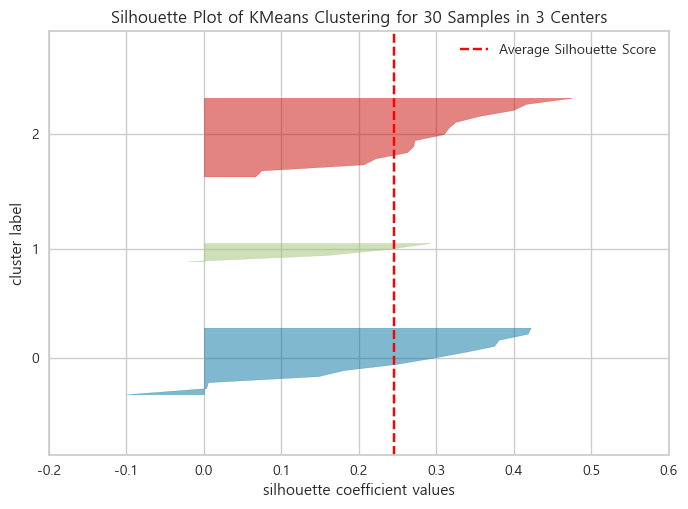

실루엣 계수 =  0.2446


In [25]:
# yellowbrick 라이브러리의 SilhouetteVisualizer 이용

clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


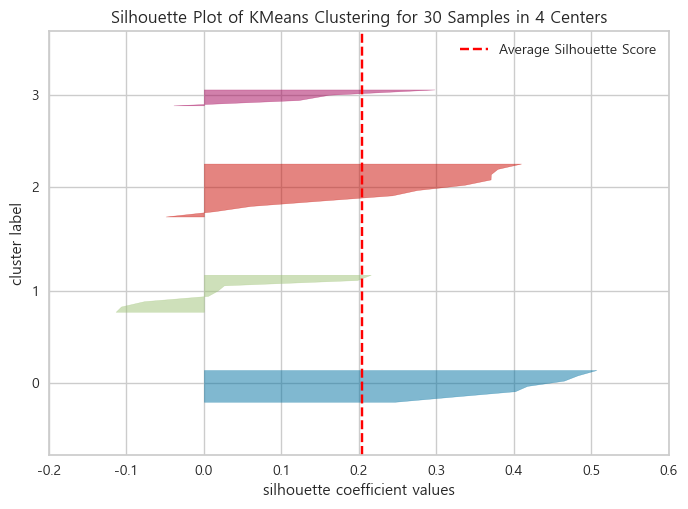

실루엣 계수 =  0.2034


In [26]:
clus = KMeans(4)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gksxk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


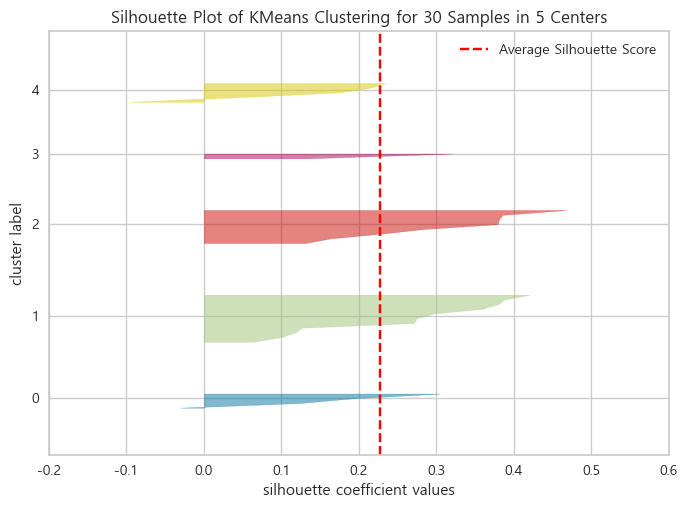

실루엣 계수 =  0.2278


In [27]:
clus = KMeans(5)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

### @참조:DBSCAN 군집

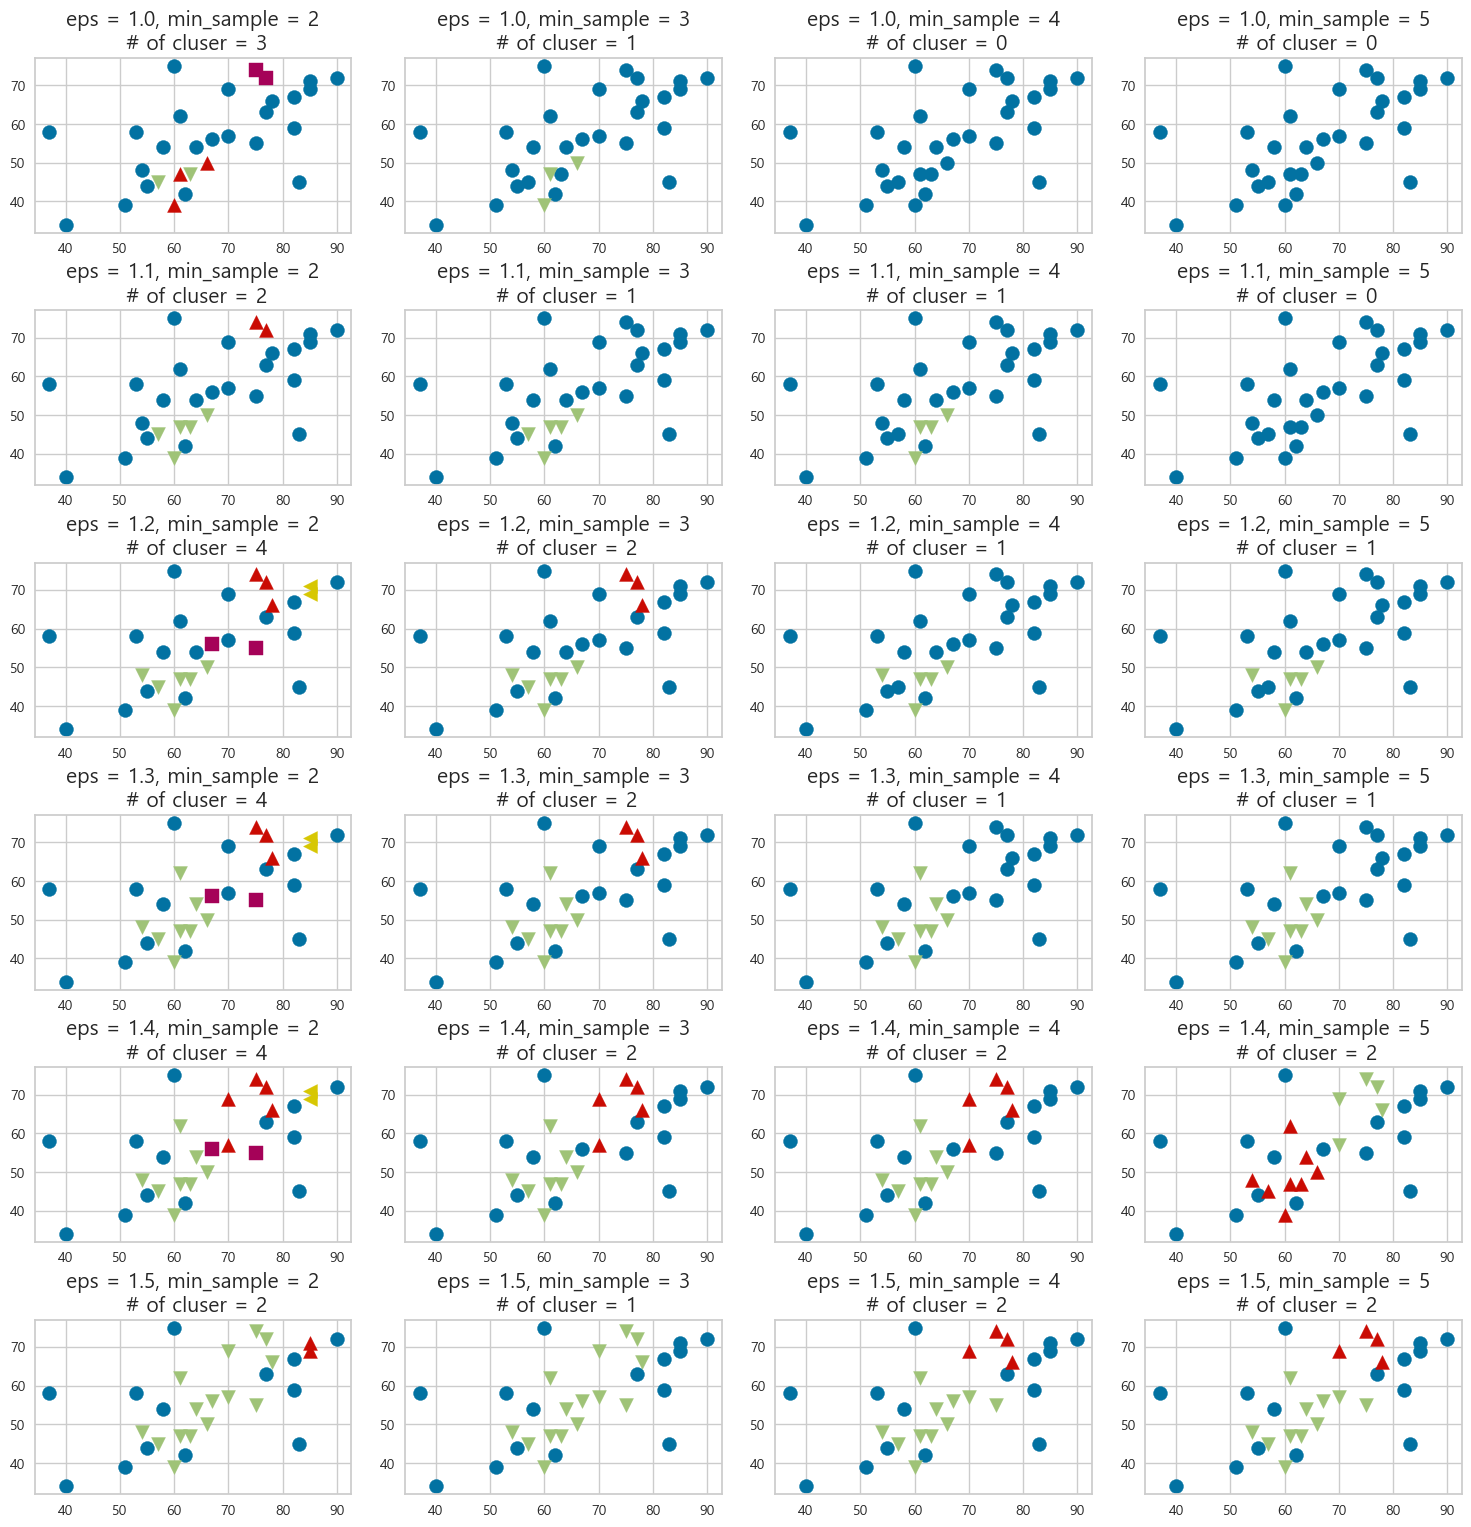

In [28]:
# X축: DISSATIS 변수, Y축: CHANCE
X = df_raw["DISSATIS"]
Y = df_raw["CHANCE"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot 간 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) +\
                                 "\n # of cluser = " + str(max(clusters)), fontsize = 15)


In [29]:
# eps: 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)
# 군집 결과
cluster_DB = dbscan.labels_
# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른 계층형, K-평균은 1번 군집부터 시작하므로 다른 군집 번호와 통일. Noise 데이터는 0번 군집으로 표기
for (i, val) in enumerate(cluster_DB):
    if val < 0:
        cluster_DB[i] = 0
    else:
        cluster_DB[i] = cluster_DB[i] + 1
df_raw["cluster_DB"] = cluster_DB
df_raw.head()


,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM,cluster_DB
0,43,51,30,39,61,92,45,1,1,0
1,63,64,51,54,63,73,47,5,1,1
2,71,70,68,69,76,86,48,3,3,2
3,61,63,45,47,54,84,35,1,1,1
4,81,78,56,66,71,83,47,3,3,2


In [30]:
# DB 스캔 군집별 요약 통계량
df_summary_DB = df_raw.drop(["cluster_H", "cluster_KM"],
                                   axis = 1,
                                   inplace=False).\
                groupby("cluster_DB").agg(["min", "mean", "max"])
level0 = df_summary_DB.columns.get_level_values(0)
level1 = df_summary_DB.columns.get_level_values(1)
df_summary_DB.columns = level0 + "_" + level1
df_summary_DB.reset_index(inplace = True)
df_summary_DB.round(3)


,cluster_DB,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
